<a href="https://colab.research.google.com/github/BrianaNzivu/DSA-ML/blob/main/Image_Classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [13]:
# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

# Reshape the images to have a single channel
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)


In [14]:
# Initialize the CNN model
model = Sequential()

# Convolutional layer with 32 filters, each 3x3
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

# Pooling layer to reduce spatial dimensions
model.add(MaxPooling2D((2, 2)))

# Convolutional layer with 64 filters, each 3x3
model.add(Conv2D(64, (3, 3), activation='relu'))

# Pooling layer to reduce spatial dimensions
model.add(MaxPooling2D((2, 2)))

# Flatten layer to convert 2D feature maps to 1D feature vectors
model.add(Flatten())

# Fully connected layer with 64 neurons
model.add(Dense(64, activation='relu'))

# Output layer with 10 neurons (one for each digit) and softmax activation
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 64)               

In [15]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/10
469/469 [==============================] - 42s 88ms/step - loss: 0.2343 - accuracy: 0.9307 - val_loss: 0.0723 - val_accuracy: 0.9769
Epoch 2/10
469/469 [==============================] - 42s 91ms/step - loss: 0.0638 - accuracy: 0.9803 - val_loss: 0.0450 - val_accuracy: 0.9855
Epoch 3/10
469/469 [==============================] - 41s 88ms/step - loss: 0.0455 - accuracy: 0.9861 - val_loss: 0.0402 - val_accuracy: 0.9874
Epoch 4/10
469/469 [==============================] - 43s 91ms/step - loss: 0.0360 - accuracy: 0.9885 - val_loss: 0.0373 - val_accuracy: 0.9873
Epoch 5/10
469/469 [==============================] - 42s 89ms/step - loss: 0.0290 - accuracy: 0.9912 - val_loss: 0.0310 - val_accuracy: 0.9897
Epoch 6/10
469/469 [==============================] - 41s 88ms/step - loss: 0.0237 - accuracy: 0.9923 - val_loss: 0.0418 - val_accuracy: 0.9863
Epoch 7/10
469/469 [==============================] - 42s 89ms/step - loss: 0.0194 - accuracy: 0.9941 - val_loss: 0.0295 - val_accuracy:

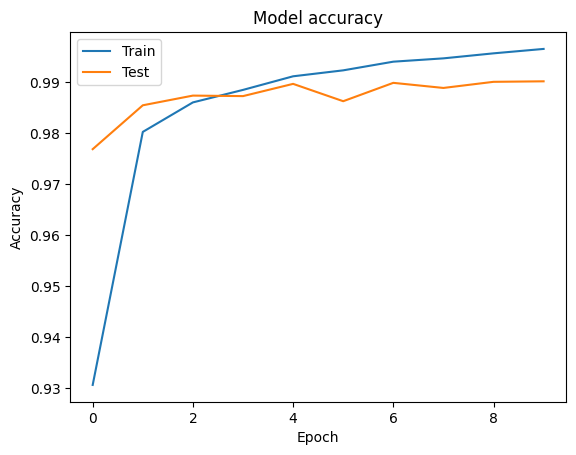

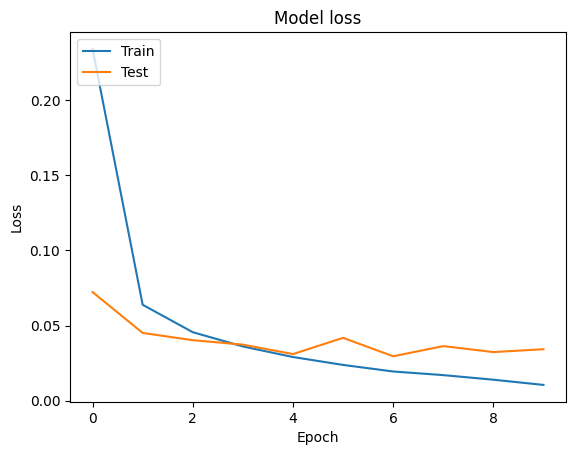

In [16]:

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
